# **Lung Cancer Prediction Using 10 models**

##### Lung cancer prediction using 10 machine learning classification models using Scikit-learn library in Python is a code implementation that aims to develop a predictive model for detecting lung cancer in patients. The code uses 10 different machine learning algorithms, including logistic regression, decision tree, k-nearest neighbor, Gaussian naive Bayes, multinomial naive Bayes, support vector classifier, random forest, XGBoost, multi-layer perceptron, and gradient boosting classifier, to predict the likelihood of lung cancer based on a range of variables. The dataset used in the code includes various columns such as gender, age, smoking, yellow fingers, anxiety, peer pressure, chronic disease, fatigue, allergy, wheezing, alcohol consuming, coughing, shortness of breath, swallowing difficulty, chest pain, and lung cancer. By analyzing these variables and using machine learning algorithms to identify patterns and correlations, the predictive models can provide accurate assessments of a patient's risk of developing lung cancer.####

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('./survey_lung_cancer.csv')
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


**Note: In this dataset, YES=2 & NO=1**

In [4]:
df.shape

(309, 16)

In [5]:
#Checking for Duplicates
df.duplicated().sum()

np.int64(33)

In [6]:
#Removing Duplicates
df=df.drop_duplicates()

In [7]:
#Checking for null values
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            276 n

In [9]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


**In this dataset, GENDER & LUNG_CANCER attributes are in object data type. So, let's convert them to numerical values using LabelEncoder from sklearn.
LabelEncoder is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1.
It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels. Also let's make every other attributes as YES=1 & NO=0.**

In [10]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['GENDER']=le.fit_transform(df['GENDER'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])
df['SMOKING']=le.fit_transform(df['SMOKING'])
df['YELLOW_FINGERS']=le.fit_transform(df['YELLOW_FINGERS'])
df['ANXIETY']=le.fit_transform(df['ANXIETY'])
df['PEER_PRESSURE']=le.fit_transform(df['PEER_PRESSURE'])
df['CHRONIC DISEASE']=le.fit_transform(df['CHRONIC DISEASE'])
df['FATIGUE ']=le.fit_transform(df['FATIGUE '])
df['ALLERGY ']=le.fit_transform(df['ALLERGY '])
df['WHEEZING']=le.fit_transform(df['WHEEZING'])
df['ALCOHOL CONSUMING']=le.fit_transform(df['ALCOHOL CONSUMING'])
df['COUGHING']=le.fit_transform(df['COUGHING'])
df['SHORTNESS OF BREATH']=le.fit_transform(df['SHORTNESS OF BREATH'])
df['SWALLOWING DIFFICULTY']=le.fit_transform(df['SWALLOWING DIFFICULTY'])
df['CHEST PAIN']=le.fit_transform(df['CHEST PAIN'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])

In [11]:
#Let's check what's happened now
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,59,0,1,1,1,0,0,1,1,0,1,0,1,0,1
280,0,59,1,0,0,0,1,1,1,0,0,0,1,0,0,0
281,1,55,1,0,0,0,0,1,1,0,0,0,1,0,1,0
282,1,46,0,1,1,0,0,0,0,0,0,0,0,1,1,0


**Note: Male=1 & Female=0. Also for other variables, YES=1 & NO=0**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 276 non-null    int64
 1   AGE                    276 non-null    int64
 2   SMOKING                276 non-null    int64
 3   YELLOW_FINGERS         276 non-null    int64
 4   ANXIETY                276 non-null    int64
 5   PEER_PRESSURE          276 non-null    int64
 6   CHRONIC DISEASE        276 non-null    int64
 7   FATIGUE                276 non-null    int64
 8   ALLERGY                276 non-null    int64
 9   WHEEZING               276 non-null    int64
 10  ALCOHOL CONSUMING      276 non-null    int64
 11  COUGHING               276 non-null    int64
 12  SHORTNESS OF BREATH    276 non-null    int64
 13  SWALLOWING DIFFICULTY  276 non-null    int64
 14  CHEST PAIN             276 non-null    int64
 15  LUNG_CANCER            276 non-null    int64


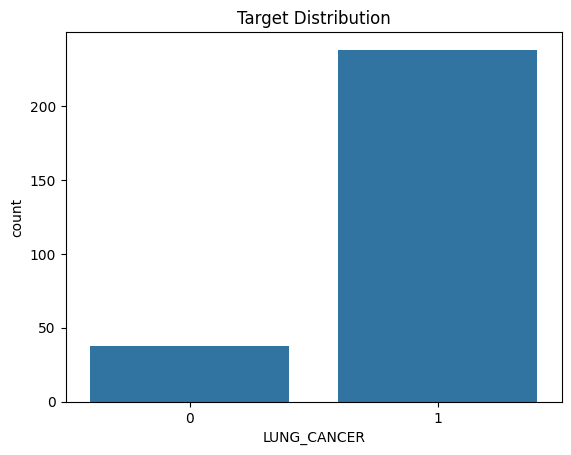

In [13]:
#Let's check the distributaion of Target variable.
sns.countplot(x='LUNG_CANCER', data=df,)
plt.title('Target Distribution');

##### ***That is, Target Distribution is imbalanced.***

In [14]:
df['LUNG_CANCER'].value_counts()

LUNG_CANCER
1    238
0     38
Name: count, dtype: int64

***We will handle this imbalance before applyig algorithm.***

**Now let's do some Data Visualizations for the better understanding of how the independent features are related to the target variable..**

In [15]:
# function for plotting
def plot(col, df=df):
    return df.groupby(col)['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))

<Axes: xlabel='GENDER'>

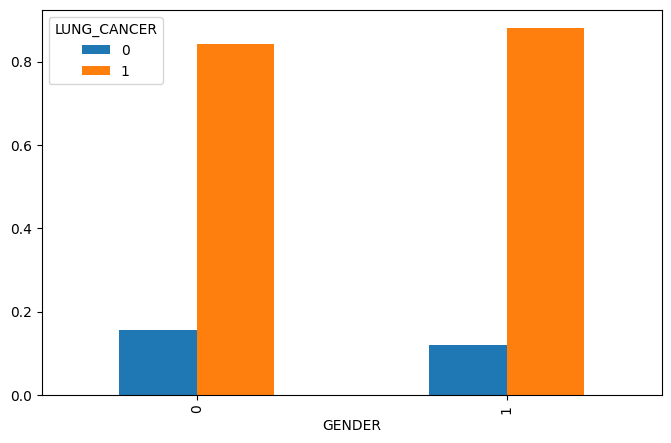

In [16]:
plot('GENDER')

<Axes: xlabel='AGE'>

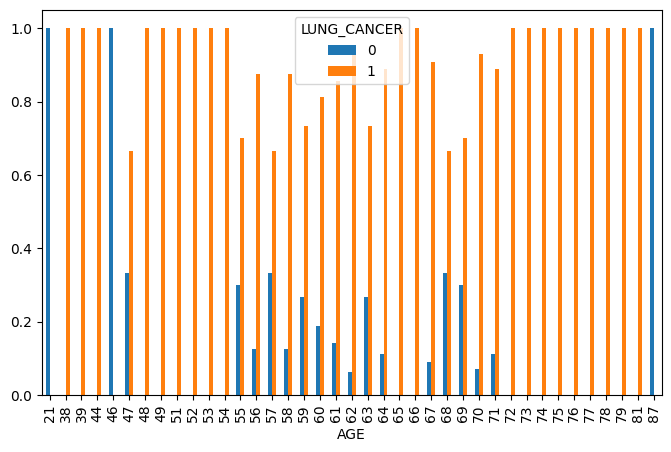

In [17]:
plot('AGE')

<Axes: xlabel='SMOKING'>

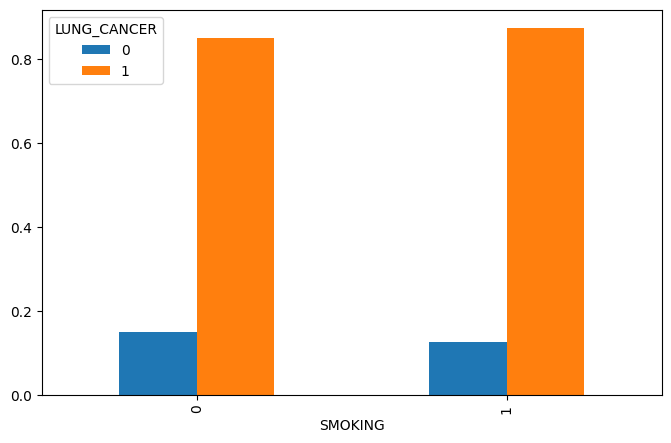

In [18]:
plot('SMOKING')

<Axes: xlabel='YELLOW_FINGERS'>

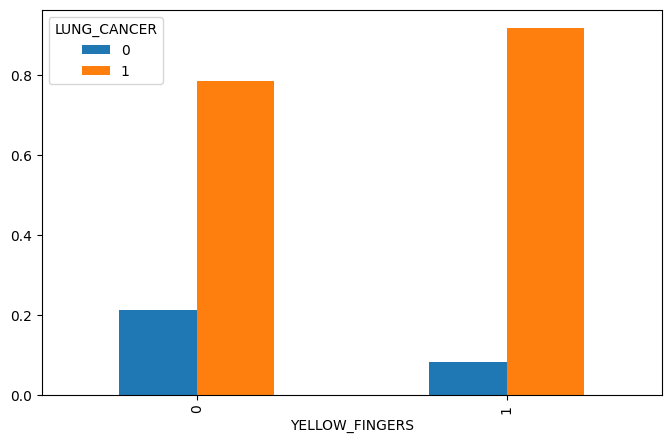

In [19]:
plot('YELLOW_FINGERS')

<Axes: xlabel='ANXIETY'>

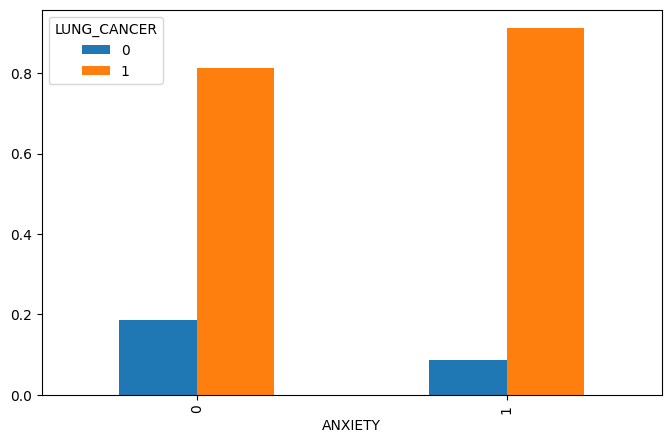

In [20]:
plot('ANXIETY')

<Axes: xlabel='PEER_PRESSURE'>

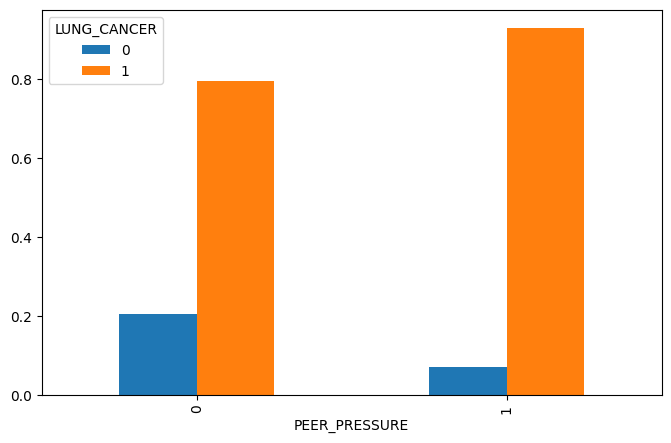

In [21]:
plot('PEER_PRESSURE')

<Axes: xlabel='CHRONIC DISEASE'>

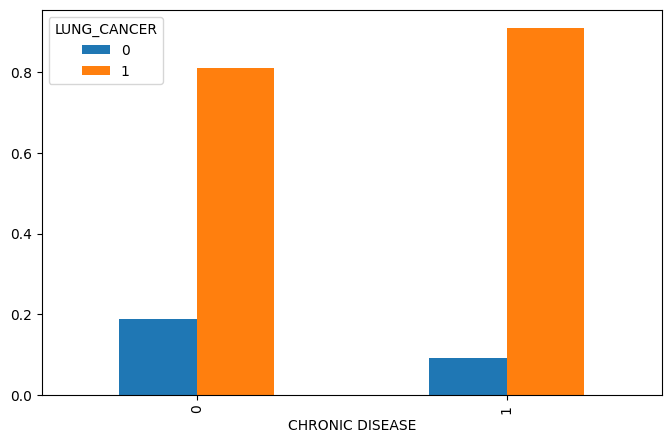

In [22]:
plot('CHRONIC DISEASE')

<Axes: xlabel='FATIGUE '>

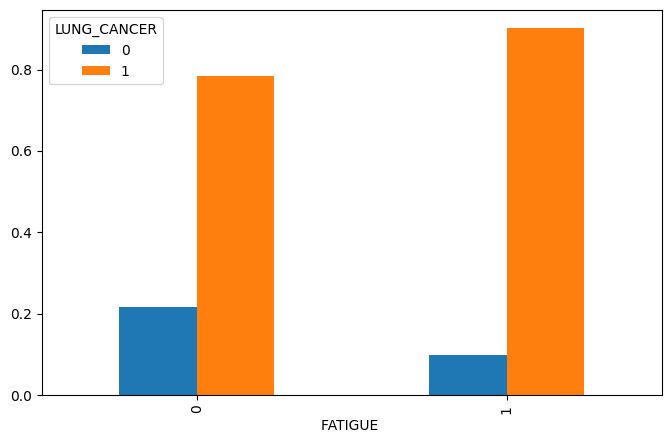

In [23]:
plot('FATIGUE ')

<Axes: xlabel='ALLERGY '>

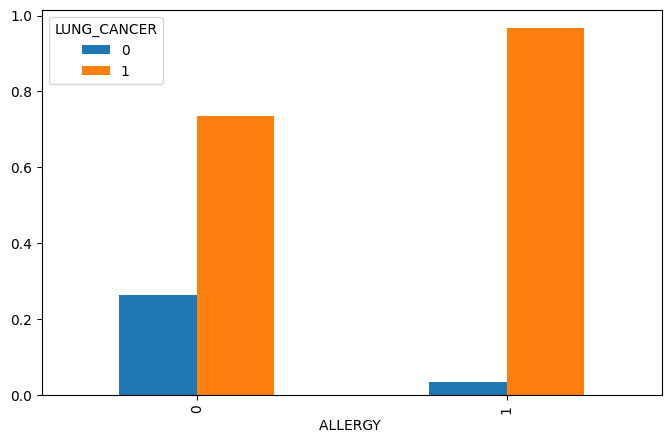

In [24]:
plot('ALLERGY ')

<Axes: xlabel='WHEEZING'>

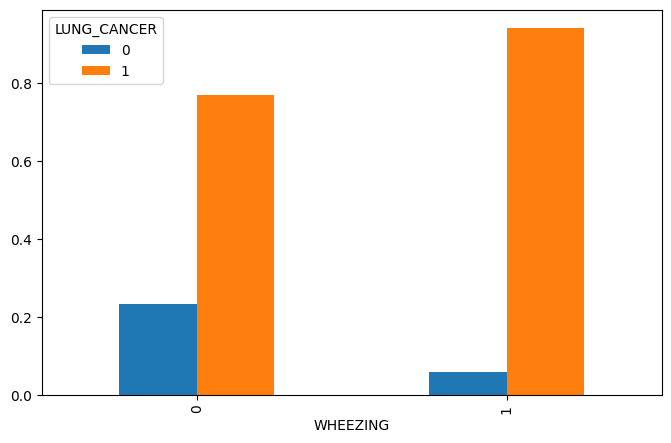

In [25]:
plot('WHEEZING')

<Axes: xlabel='ALCOHOL CONSUMING'>

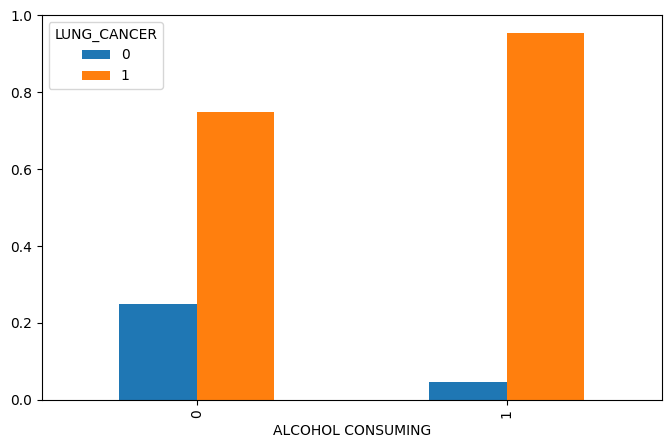

In [26]:
plot('ALCOHOL CONSUMING')

<Axes: xlabel='COUGHING'>

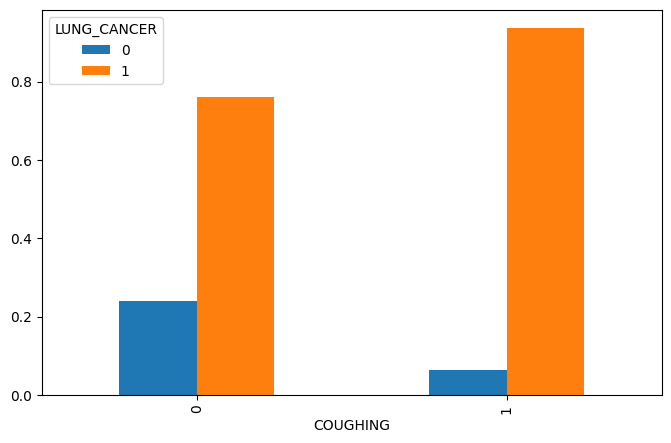

In [27]:
plot('COUGHING')

<Axes: xlabel='SHORTNESS OF BREATH'>

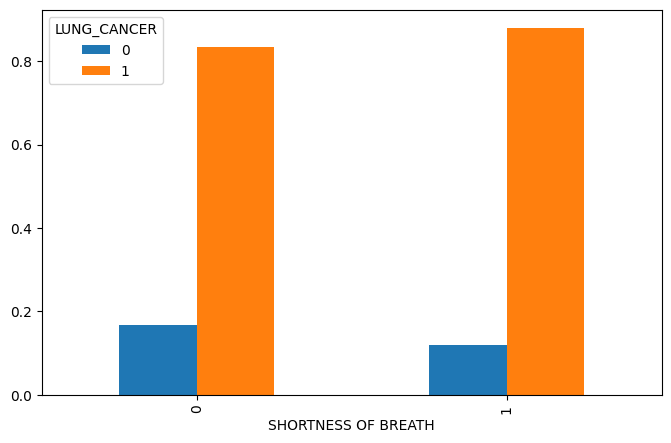

In [28]:
plot('SHORTNESS OF BREATH')

<Axes: xlabel='SWALLOWING DIFFICULTY'>

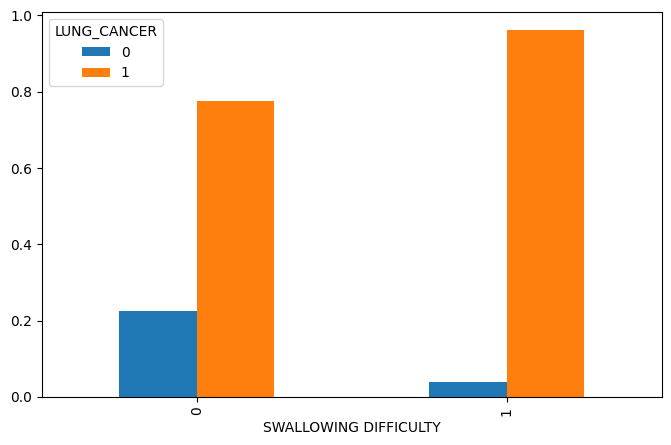

In [29]:
plot('SWALLOWING DIFFICULTY')

<Axes: xlabel='CHEST PAIN'>

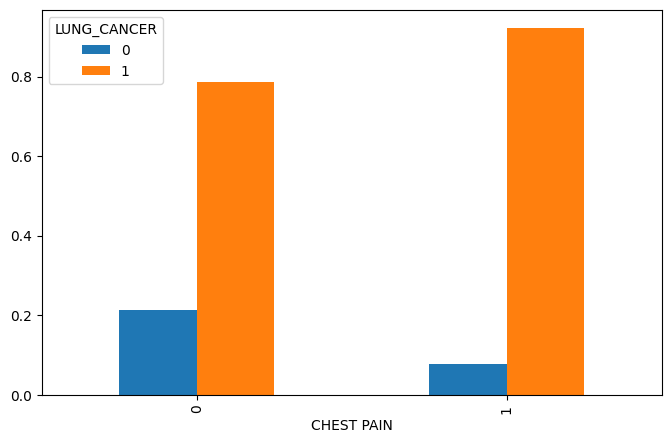

In [30]:
plot('CHEST PAIN')

**From the visualizations, it is clear that in the given dataset, the features GENDER, AGE, SMOKING and SHORTNESS OF BREATH don't have that much relationship with LUNG CANCER. So let's drop those features to make this dataset more clean.**

In [31]:
df_new=df.drop(columns=['GENDER','AGE', 'SMOKING', 'SHORTNESS OF BREATH'])
df_new

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,1,0,0,1,0,1,1,1,1,1,1
1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,0,1,0,1,0,1,0,1,0,1,0
3,1,1,0,0,0,0,0,1,0,1,1,0
4,1,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,1,1,0,0,1,1,0,1,1,0,1
280,0,0,0,1,1,1,0,0,0,0,0,0
281,0,0,0,0,1,1,0,0,0,0,1,0
282,1,1,0,0,0,0,0,0,0,1,1,0


**CORRELATION**

In [32]:
#Finding Correlation
cn=df_new.corr()
cn

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
YELLOW_FINGERS,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,0.333349,-0.099169,0.189192
ANXIETY,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,0.478820,-0.123182,0.144322
PEER_PRESSURE,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,0.327764,-0.074655,0.195086
CHRONIC DISEASE,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,0.068263,-0.048895,0.143692
FATIGUE,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,-0.115727,0.013757,0.160078
ALLERGY,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.037581,0.245440,0.333552
WHEEZING,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.108304,0.142846,0.249054
ALCOHOL CONSUMING,-0.273643,-0.152228,-0.132603,0.010144,-0.181573,0.378125,0.261061,1.000000,0.198023,-0.000635,0.310767,0.294422
COUGHING,0.020803,-0.218843,-0.068224,-0.160813,0.148538,0.206367,0.353657,0.198023,1.000000,-0.136885,0.077988,0.253027
SWALLOWING DIFFICULTY,0.333349,0.478820,0.327764,0.068263,-0.115727,-0.037581,0.108304,-0.000635,-0.136885,1.000000,0.102674,0.268940


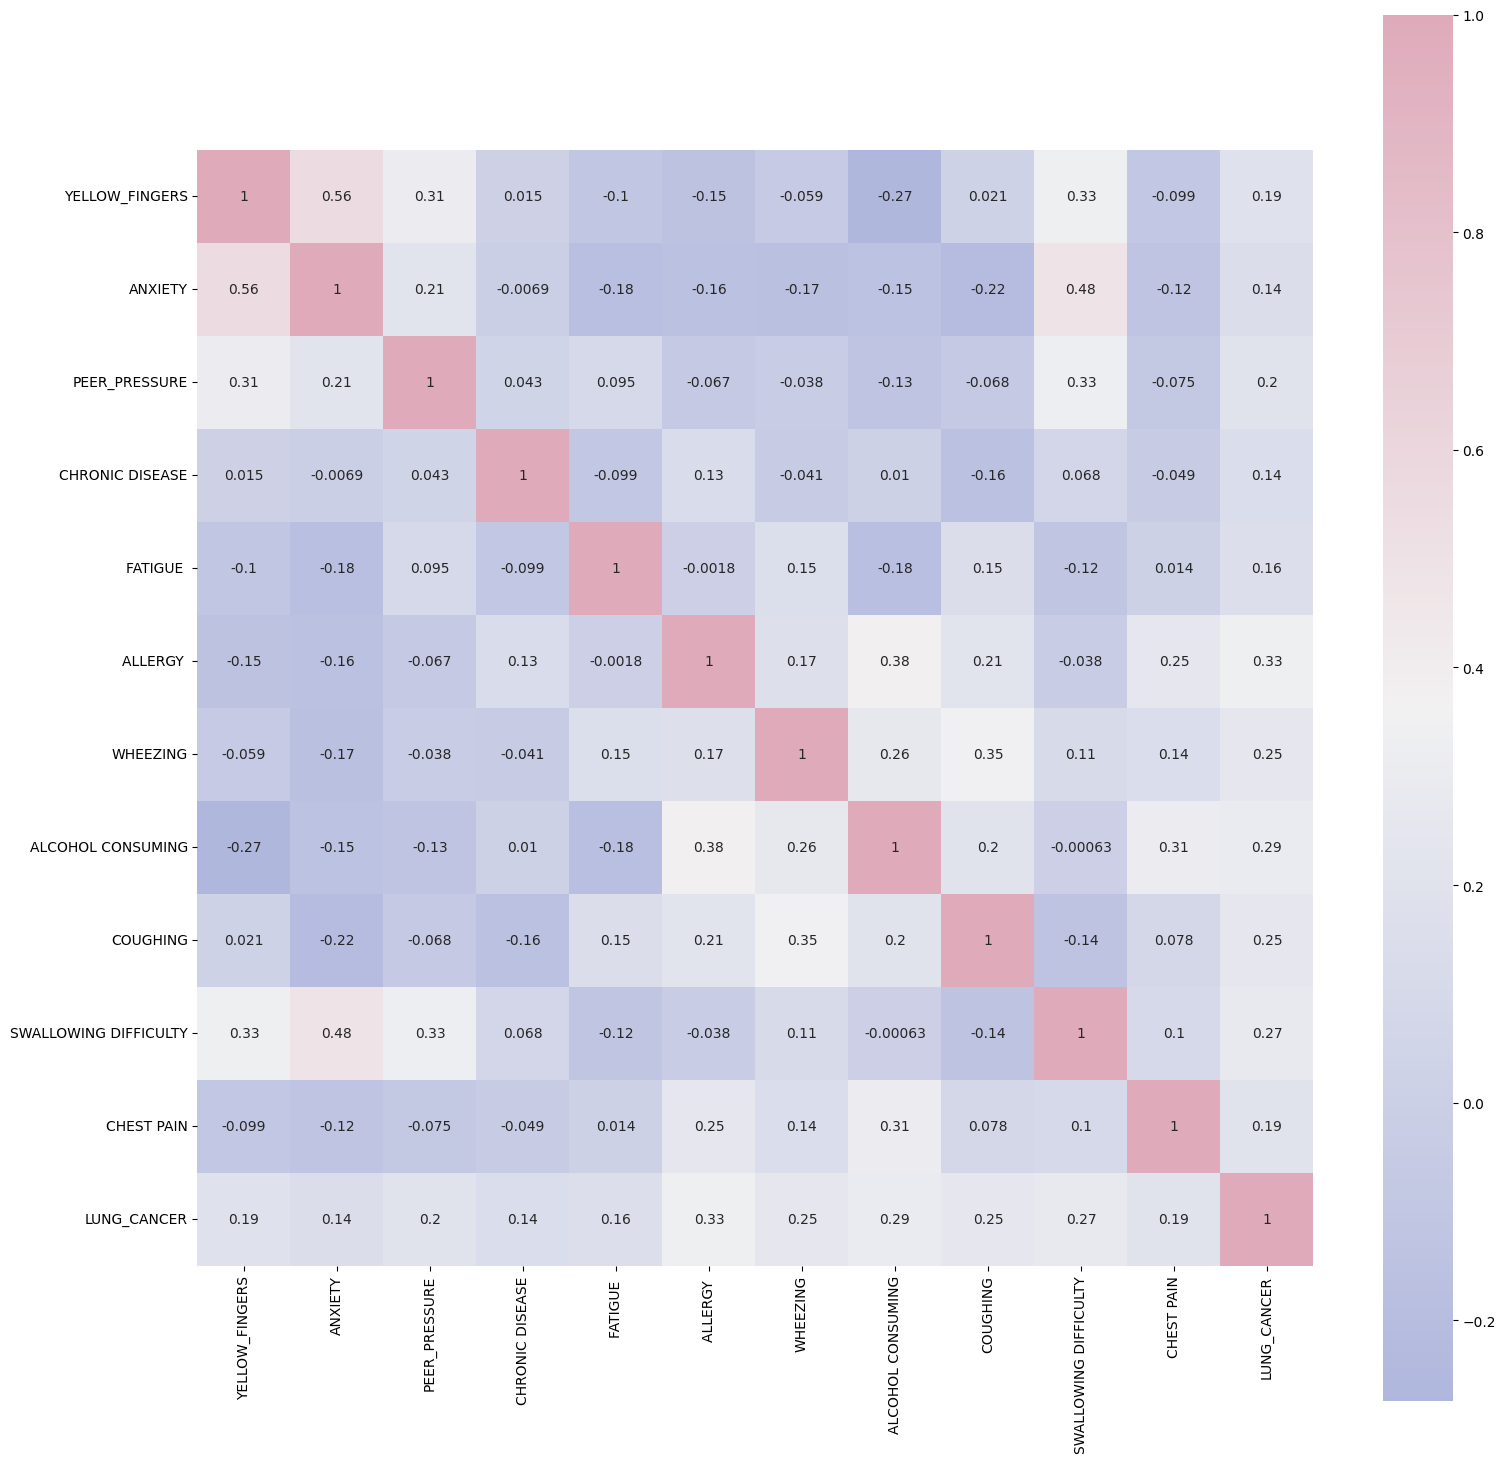

In [33]:
#Correlation 
cmap=sns.diverging_palette(260,-10,s=50, l=75, n=6,
as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(cn,cmap=cmap,annot=True, square=True)
plt.show()

<Axes: >

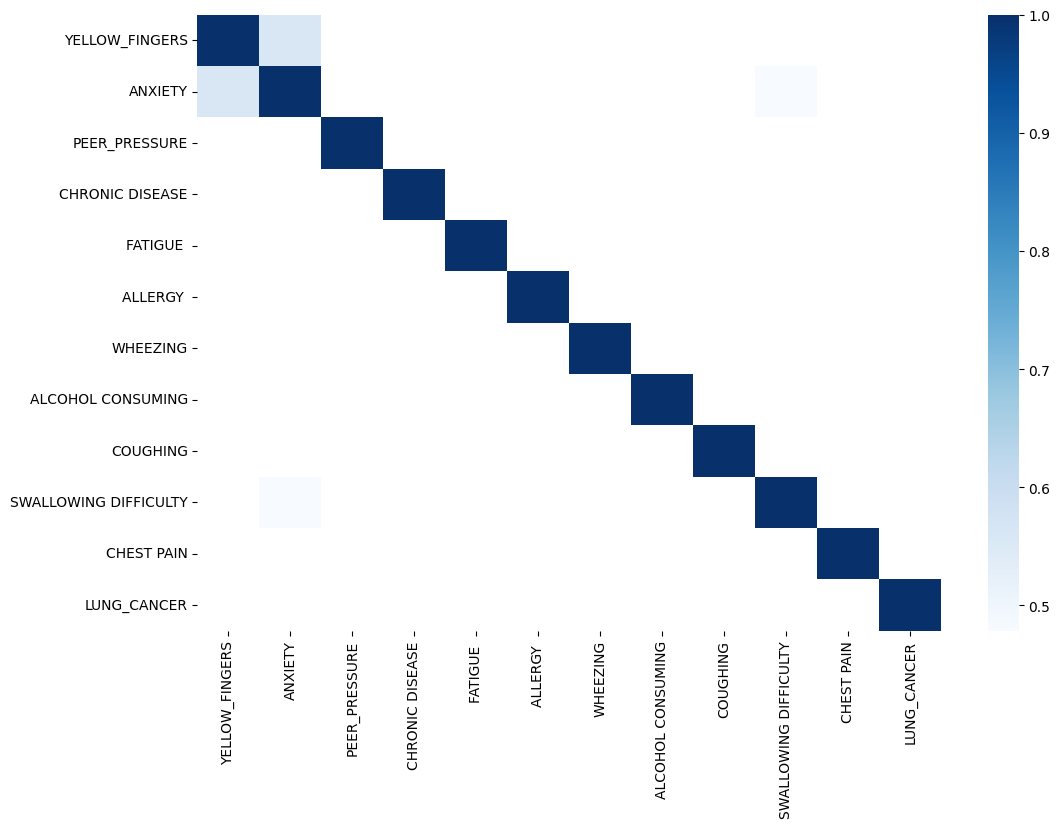

In [34]:
kot = cn[cn>=.40]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Blues")

# ***Feature Engineering***

Feature Engineering is the process of creating new features using existing features.

***The correlation matrix shows that ANXIETY and YELLOW_FINGERS are correlated more than 50%. So, lets create a new feature combining them.***

In [35]:
df_new['ANXYELFIN']=df_new['ANXIETY']*df_new['YELLOW_FINGERS']
df_new

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,ANXYELFIN
0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,0,0,1,1,1,0,0,0,1,1,1,0
2,0,0,1,0,1,0,1,0,1,0,1,0,0
3,1,1,0,0,0,0,0,1,0,1,1,0,1
4,1,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,1,1,0,0,1,1,0,1,1,0,1,1
280,0,0,0,1,1,1,0,0,0,0,0,0,0
281,0,0,0,0,1,1,0,0,0,0,1,0,0
282,1,1,0,0,0,0,0,0,0,1,1,0,1


In [79]:
#Splitting independent and dependent variables
X = df_new.drop('LUNG_CANCER', axis = 1)
y = df_new['LUNG_CANCER']

# ***Target Distribution Imbalance Handling***

In [80]:
from sklearn.utils import shuffle
from collections import Counter

# Combine features and labels into one DataFrame
data_combined = pd.concat([pd.DataFrame(X), pd.Series(y, name='target')], axis=1)

# Check class distribution before oversampling
class_counts = data_combined['target'].value_counts()
print("Before oversampling:\n", class_counts)

# Identify majority and minority classes
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()

data_majority = data_combined[data_combined['target'] == majority_class]
data_minority = data_combined[data_combined['target'] == minority_class]

# Oversample the minority class to match the majority class size
data_minority_oversampled = data_minority.sample(len(data_majority), replace=True, random_state=42)

# Concatenate and shuffle the resampled dataset
data_balanced = pd.concat([data_majority, data_minority_oversampled])
data_balanced = shuffle(data_balanced, random_state=42)

# Split back into X and y
X_resampled = data_balanced.drop('target', axis=1).values
y_resampled = data_balanced['target'].values

# Show new class distribution
print("After oversampling:", Counter(y_resampled))


Before oversampling:
 target
1    238
0     38
Name: count, dtype: int64
After oversampling: Counter({0: 238, 1: 238})


In [ ]:
len(X)

# **Logistic Regression**

In [81]:
#Splitting data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_resampled, y_resampled, test_size= 0.25, random_state=0)

In [82]:
#Fitting training data to the model
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [83]:
#Predicting result using testing data
y_lr_pred= lr_model.predict(X_test)
y_lr_pred

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1])

In [84]:
#Model accuracy
from sklearn.metrics import classification_report, accuracy_score, f1_score
lr_cr=classification_report(y_test, y_lr_pred)
print(lr_cr)

              precision    recall  f1-score   support

           0       0.87      0.95      0.90        55
           1       0.95      0.88      0.91        64

    accuracy                           0.91       119
   macro avg       0.91      0.91      0.91       119
weighted avg       0.91      0.91      0.91       119



**This model is almost 92% accurate.**

# **Decision Tree**

In [85]:
#Fitting training data to the model
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier(criterion='entropy', random_state=0)  
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [86]:
#Predicting result using testing data
y_dt_pred= dt_model.predict(X_test)
y_dt_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1])

In [87]:
#Model accuracy
dt_cr=classification_report(y_test, y_dt_pred)
print(dt_cr)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.98      0.92      0.95        64

    accuracy                           0.95       119
   macro avg       0.95      0.95      0.95       119
weighted avg       0.95      0.95      0.95       119



**This model is 96% accurate.**

# **K Nearest Neighbor**

In [88]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
knn_model= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [89]:
#Predicting result using testing data
y_knn_pred= knn_model.predict(X_test)
y_knn_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1])

In [90]:
#Model accuracy
knn_cr=classification_report(y_test, y_knn_pred)
print(knn_cr)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        55
           1       0.98      0.89      0.93        64

    accuracy                           0.93       119
   macro avg       0.93      0.94      0.93       119
weighted avg       0.94      0.93      0.93       119



**This model is 94% accurate.**

# **Gaussian Naive Bayes**

In [91]:
#Fitting Gaussian Naive Bayes classifier to the training set  
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

In [92]:
#Predicting result using testing data
y_gnb_pred= gnb_model.predict(X_test)
y_gnb_pred

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1])

In [93]:
#Model accuracy
gnb_cr=classification_report(y_test, y_gnb_pred)
print(gnb_cr)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        55
           1       0.89      0.91      0.90        64

    accuracy                           0.89       119
   macro avg       0.89      0.89      0.89       119
weighted avg       0.89      0.89      0.89       119



**This model is 90% accurate.**

# **Multinomial Naive Bayes**

In [94]:
#Fitting Multinomial Naive Bayes classifier to the training set  
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)

MultinomialNB()

In [95]:
#Predicting result using testing data
y_mnb_pred= mnb_model.predict(X_test)
y_mnb_pred

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1])

In [96]:
#Model accuracy
mnb_cr=classification_report(y_test, y_mnb_pred)
print(mnb_cr)

              precision    recall  f1-score   support

           0       0.72      0.78      0.75        55
           1       0.80      0.73      0.76        64

    accuracy                           0.76       119
   macro avg       0.76      0.76      0.76       119
weighted avg       0.76      0.76      0.76       119



**This model is 80% accurate.**

# **Support Vector Classifier**

In [97]:
#Fitting SVC to the training set  
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [98]:
#Predicting result using testing data
y_svc_pred= svc_model.predict(X_test)
y_svc_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1])

In [99]:
#Model accuracy
svc_cr=classification_report(y_test, y_svc_pred)
print(svc_cr)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.98      0.95      0.97        64

    accuracy                           0.97       119
   macro avg       0.97      0.97      0.97       119
weighted avg       0.97      0.97      0.97       119



**This model is 98% accurate.**

# **Random Forest**

In [100]:
#Training
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [101]:
#Predicting result using testing data
y_rf_pred= rf_model.predict(X_test)
y_rf_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1])

In [102]:
#Model accuracy
rf_cr=classification_report(y_test, y_rf_pred)
print(rf_cr)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.98      0.92      0.95        64

    accuracy                           0.95       119
   macro avg       0.95      0.95      0.95       119
weighted avg       0.95      0.95      0.95       119



**This model is also 97% accurate.**

# **XGBoost**

In [103]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [104]:
#Predicting result using testing data
y_xgb_pred= xgb_model.predict(X_test)
y_xgb_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1])

In [105]:
#Model accuracy
xgb_cr=classification_report(y_test, y_xgb_pred)
print(xgb_cr)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.98      0.92      0.95        64

    accuracy                           0.95       119
   macro avg       0.95      0.95      0.95       119
weighted avg       0.95      0.95      0.95       119



**This model is also 97% accurate.**

# **Multi-layer Perceptron classifier**

In [106]:
#Training a neural network model
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)

MLPClassifier()

In [107]:
#Predicting result using testing data
y_mlp_pred= mlp_model.predict(X_test)
y_mlp_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1])

In [108]:
#Model accuracy
mlp_cr=classification_report(y_test, y_mlp_pred)
print(mlp_cr)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.98      0.92      0.95        64

    accuracy                           0.95       119
   macro avg       0.95      0.95      0.95       119
weighted avg       0.95      0.95      0.95       119



**This model is also 95% accurate.**

# **Gradient Boosting**

In [109]:
#Training
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [110]:
#Predicting result using testing data
y_gb_pred= gb_model.predict(X_test)
y_gb_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1])

In [111]:
#Model accuracy
gb_cr=classification_report(y_test, y_gb_pred)
print(gb_cr)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.98      0.94      0.96        64

    accuracy                           0.96       119
   macro avg       0.96      0.96      0.96       119
weighted avg       0.96      0.96      0.96       119



**This model is also 98% accurate.**

From the above calculated accuracies, it is clear that the SVC, Random Forest, Multi-layer Perceptron and Gradient Boost models performed atmost level while the worst performed one is Multinomial Naive Bayes. 
However, I'm interested in a more efficient way of evaluating these models. Let's go for the Cross Validation methods using both K-Fold and Stratified K-Fold

# **Cross Validation**

K-Fold cross validation is a popular technique used in machine learning for model evaluation and selection. It involves dividing a dataset into K subsets of equal size, called folds. The algorithm then trains and evaluates the model K times, each time using a different fold as the validation set and the remaining K-1 folds as the training set.

During each iteration of K-Fold cross validation, the model is trained on K-1 folds and evaluated on the remaining fold. The performance metrics are then averaged over all K iterations to obtain an estimate of the model's overall performance.

K-Fold cross validation is a robust method for model evaluation because it uses all the available data for training and testing. It also helps to reduce the risk of overfitting and provides a more accurate estimate of the model's performance than using a single training-test split.

Typically, values of K between 5 and 10 are used for K-Fold cross validation, but the optimal value of K may vary depending on the size and complexity of the dataset, as well as the type of model being evaluated.

Here are some general guidelines that can help you choose an appropriate value of K:

1. For small datasets, it is recommended to use a larger value of K, such as 10. This is because the larger value of K allows for more robust estimates of model performance, given the limited amount of data.

2. For larger datasets, a smaller value of K can be used, such as 5. This is because a larger value of K will result in K smaller training sets, which may not be representative of the full dataset. Using a smaller value of K ensures that each fold has a sufficient amount of data for both training and testing.

3. For models that are computationally expensive or time-consuming to train, a smaller value of K is preferred to reduce the overall training time.

4. It's also essential to note that the choice of K should not be based solely on the accuracy of the model. Other metrics, such as precision, recall, and F1 score, should also be considered, as they can provide valuable insights into the performance of the model.

In [112]:
# K-Fold Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)


# Logistic regerssion model
lr_model_scores = cross_val_score(lr_model,X, y, cv=kf)

# Decision tree model
dt_model_scores = cross_val_score(dt_model,X, y, cv=kf)

# KNN model
knn_model_scores = cross_val_score(knn_model,X, y, cv=kf)

# Gaussian naive bayes model
gnb_model_scores = cross_val_score(gnb_model,X, y, cv=kf)

# Multinomial naive bayes model
mnb_model_scores = cross_val_score(mnb_model,X, y, cv=kf)

# Support Vector Classifier model
svc_model_scores = cross_val_score(svc_model,X, y, cv=kf)

# Random forest model
rf_model_scores = cross_val_score(rf_model,X, y, cv=kf)

# XGBoost model
xgb_model_scores = cross_val_score(xgb_model,X, y, cv=kf)

# Multi-layer perceptron model
mlp_model_scores = cross_val_score(mlp_model,X, y, cv=kf)

# Gradient boost model
gb_model_scores = cross_val_score(gb_model,X, y, cv=kf)


print("Logistic regression models' average accuracy:", np.mean(lr_model_scores))
print("Decision tree models' average accuracy:", np.mean(dt_model_scores))
print("KNN models' average accuracy:", np.mean(knn_model_scores))
print("Gaussian naive bayes models' average accuracy:", np.mean(gnb_model_scores))
print("Multinomial naive bayes models' average accuracy:", np.mean(mnb_model_scores))
print("Support Vector Classifier models' average accuracy:", np.mean(svc_model_scores))
print("Random forest models' average accuracy:", np.mean(rf_model_scores))
print("XGBoost models' average accuracy:", np.mean(xgb_model_scores))
print("Multi-layer perceptron models' average accuracy:", np.mean(mlp_model_scores))
print("Gradient boost models' average accuracy:", np.mean(gb_model_scores))

Logistic regression models' average accuracy: 0.9093915343915345
Decision tree models' average accuracy: 0.8985449735449735
KNN models' average accuracy: 0.8984126984126986
Gaussian naive bayes models' average accuracy: 0.8984126984126986
Multinomial naive bayes models' average accuracy: 0.8625661375661376
Support Vector Classifier models' average accuracy: 0.8842592592592593
Random forest models' average accuracy: 0.894973544973545
XGBoost models' average accuracy: 0.8842592592592592
Multi-layer perceptron models' average accuracy: 0.894973544973545
Gradient boost models' average accuracy: 0.8914021164021163


**So the K-Fold cross validation is showing Gradient Boost model gives the most accuracy of 95.6%, and Decision Tree model also gives almost same accuracy, while Multinomial Naive Bayes model gives the least accuarcy of 74.2%.**

Stratified K-Fold cross-validation is a modification of the standard K-Fold cross-validation technique that is commonly used in machine learning when working with imbalanced datasets. The goal of Stratified K-Fold cross-validation is to ensure that each fold is representative of the overall dataset in terms of the class distribution.

In standard K-Fold cross-validation, the data is split into K folds, and each fold is used as the validation set in turn. However, if the dataset has an imbalanced class distribution, this can lead to some of the folds having significantly fewer samples from the minority class, which can result in biased performance estimates.

To address this issue, Stratified K-Fold cross-validation ensures that each fold has a similar proportion of samples from each class. It works by first dividing the dataset into K folds, as in standard K-Fold cross-validation. Then, for each fold, the algorithm ensures that the proportion of samples from each class is roughly the same as the proportion in the full dataset. This ensures that the model is evaluated on a representative sample of the data, regardless of the class distribution.

Stratified K-Fold cross-validation is a powerful tool for evaluating the performance of machine learning models on imbalanced datasets. It can help to ensure that the model's performance is accurately estimated and that the model is robust to class imbalances in the dataset.

In [113]:
# K-Fold Cross Validation

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

k = 10
kf = StratifiedKFold(n_splits=k)


# Logistic regerssion model
lr_model_scores = cross_val_score(lr_model,X, y, cv=kf)

# Decision tree model
dt_model_scores = cross_val_score(dt_model,X, y, cv=kf)

# KNN model
knn_model_scores = cross_val_score(knn_model,X, y, cv=kf)

# Gaussian naive bayes model
gnb_model_scores = cross_val_score(gnb_model,X, y, cv=kf)

# Multinomial naive bayes model
mnb_model_scores = cross_val_score(mnb_model,X, y, cv=kf)

# Support Vector Classifier model
svc_model_scores = cross_val_score(svc_model,X, y, cv=kf)

# Random forest model
rf_model_scores = cross_val_score(rf_model,X, y, cv=kf)

# XGBoost model
xgb_model_scores = cross_val_score(xgb_model,X, y, cv=kf)

# Multi-layer perceptron model
mlp_model_scores = cross_val_score(mlp_model,X, y, cv=kf)

# Gradient boost model
gb_model_scores = cross_val_score(gb_model,X, y, cv=kf)


print("Logistic regression models' average accuracy:", np.mean(lr_model_scores))
print("Decision tree models' average accuracy:", np.mean(dt_model_scores))
print("KNN models' average accuracy:", np.mean(knn_model_scores))
print("Gaussian naive bayes models' average accuracy:", np.mean(gnb_model_scores))
print("Multinomial naive bayes models' average accuracy:", np.mean(mnb_model_scores))
print("Support Vector Classifier models' average accuracy:", np.mean(svc_model_scores))
print("Random forest models' average accuracy:", np.mean(rf_model_scores))
print("XGBoost models' average accuracy:", np.mean(xgb_model_scores))
print("Multi-layer perceptron models' average accuracy:", np.mean(mlp_model_scores))
print("Gradient boost models' average accuracy:", np.mean(gb_model_scores))

Logistic regression models' average accuracy: 0.9022486772486772
Decision tree models' average accuracy: 0.8773809523809524
KNN models' average accuracy: 0.9170634920634921
Gaussian naive bayes models' average accuracy: 0.8986772486772487
Multinomial naive bayes models' average accuracy: 0.8624338624338626
Support Vector Classifier models' average accuracy: 0.8986772486772487
Random forest models' average accuracy: 0.8916666666666666
XGBoost models' average accuracy: 0.8880952380952382
Multi-layer perceptron models' average accuracy: 0.9164021164021164
Gradient boost models' average accuracy: 0.8989417989417989


**So the Stratified K-Fold cross validation is showing Random Forest model gives the most accuracy of 94.6%, and also other models like Gradient Boost, Support Vector Classifier, XGBoost gives almost same accuracies, while Multinomial Naive Bayes model gives the least accuarcy of 75.7%.**